# 项目概述

    该项目是要整理,清洗WeRateDogs 推特数据，并且创建有趣且可靠的分析和可视化. 数据集是推特用户 @dog_rates 的档案, 推特昵称为 WeRateDogs。
    
    他在推特上以诙谐幽默的方式对人们的宠物狗评分.这些评分通常以 10 作为分母,但是分子则一般大于 10：11/10、12/10、13/10 等等.

## 项目过程:
###   1.数据整理
    收集数据
    评估数据
    清洗数据
###  2.探索数据
    
###  3. 书面报告 
    

# 数据整理

#### 收集数据

1. WeRateDogs 的推特档案

  2. 推特图像的预测数据

In [1]:
# 导入需要的三方库
import requests
import os 
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 创建推特图片数据文件夹
folder_name = 'image_predict'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
image_predict_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(image_predict_url)

In [3]:
# 保存数据到计算机中
with open('image-predictions.tsv',mode = 'wb') as file:
    file.write(response.content)

3. 每条推特的额外附加数据

#### 评估数据

In [4]:
# 通过目测和编程方式查看各数据集的问题
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
# 查看评分分母大于 10 的部分
df_twitter[list(df_twitter['rating_denominator']>10)].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [7]:
df_image = pd.read_csv('image-predictions.tsv',sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
df_tweet = []
with open('tweet_json.txt') as f:
    for data in f.readlines():
        df = json.loads(data)
        time = df['created_at']
        id = df['id']
        full_text = df['full_text']
        retweet_count = df['retweet_count']
        favorite_count = df['favorite_count']
        # 添加到字典中
        df_tweet.append({'created_at':time,
                          'id':id,
                          'full_text':full_text,
                          'retweet_count': retweet_count,
                          'favorite_count': favorite_count})         
df_tweet_data = pd.DataFrame(df_tweet,columns = ['created_at','id','full_text','retweet_count','favorite_count'])

In [10]:
df_tweet_data.head()

,created_at,id,full_text,retweet_count,favorite_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8842,39492
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,This is Tilly. She's just checking pup on you....,6480,33786
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4301,25445
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,This is Darla. She commenced a snooze mid meal...,8925,42863
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,This is Franklin. He would like you to stop ca...,9721,41016


In [11]:
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
created_at        2352 non-null object
id                2352 non-null int64
full_text         2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


##### 数据质量问题
    1. 'in_reply_to_status_id' 和 'in_reply_to_user_id ' 字段有很多的空值,并且对于整体数据集没有作用,可以删除
    2.  'expanded_urls' 字段有空值且该字段有重复显示的问题
    3. 'retweeted_status_id ','retweeted_status_user_id','retweeted_status_timestamp' 表示转发状态,故只要有数据则代表此行数据是转发的,需要删除
    4. 'rating_numerator' , 'rating_denominator' 字段有异常值 
    5. 狗狗名字一列,出现了很多以 'a' 和 'an' 开头的名字,查看原文,发现并没有名字,故将这些全部替换为 'None'
    6. 'timestamp' 字段是日期,数据格式不正确,需要调整
    7. 'created_at' 是日期类型,并且和 twitter-archive-enhanced 里的日期格式不同,需要调整格式
    8. 对于df_image 数据而言,P1 是测试概率最大的,所以将P2 和 P3 的测试数据作删除处理
##### 数据清洁度问题 
    1.  'doggo','floofer','pupper','puppo' 这四个字段是关于狗狗'地位'的，需要合并为一列
    2.  需要将三个数据文件合并为一个文件利于分析

#### 清理数据

In [12]:
# 在数据清洗之前先备份原数据
df_twitter_backup = df_twitter.copy()
df_image_backup = df_image.copy()
df_tweet_data_backup = df_tweet_data.copy()

 1. 'in_reply_to_status_id' 和 'in_reply_to_user_id ' 字段有很多的空值,并且对于整体数据集没有作用,可以删除

In [13]:
df_twitter_backup = df_twitter_backup.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [14]:
 # 查看运行效果
df_twitter_backup.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 2 . 'expanded_urls' 字段有空值且该字段有重复显示的问题
     -- 由于源数据无法获取,该处的空值也无法补充,只能暂时作为原样保留

3 . 'retweeted_status_id ','retweeted_status_user_id','retweeted_status_timestamp' 表示转发状态,故只要有数据则代表此行数据是转发的,需要删除

In [15]:
df_twitter_backup = df_twitter_backup[df_twitter_backup['retweeted_status_user_id'].isnull()]

In [16]:
# 测试运行结果
df_twitter_backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 271.9+ KB


In [17]:
# df_twitter_backup 数据集中 'retweeted_status_id ','retweeted_status_user_id','retweeted_status_timestamp' 三列全部都为空值,为了数据集的整洁度,可以删除
df_twitter_backup = df_twitter_backup.drop(['retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id'],axis =1 )
df_twitter_backup.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


4 . 'rating_numerator' , 'rating_denominator' 字段有异常值,需要重新运用正则表达式提取

In [18]:
# 提取 text 中的评分部分
df_twitter_backup['score'] = df_twitter_backup['text'].str.findall('.{1}((?:\d+\.)?\d+)/(\d+)')
df_twitter_backup.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,"[(13, 10)]"
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,"[(13, 10)]"
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,"[(12, 10)]"
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,"[(13, 10)]"
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,"[(12, 10)]"


In [19]:
#查看是否将 有小数点和评分前面不是空格的评分提取成功
pd.set_option('max_colwidth',200)
df_twitter_backup[df_twitter_backup['score'].astype(str) =='[]'][['text','score']]

,text,score
1672,Meet Brody. He's a Downton Abbey Falsetto. Addicted to grating cheese. He says he can stop but we know he can't\n9/10 https://t.co/vBeiQq6SaZ,[]
2092,This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,[]
2264,This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10 https://t.co/IQTOMqDUIe,[]


由以上可以得知有三行因为评分前面有一个换行符导致没有匹配成功,数据不多,可以在后续进行手工替换掉

In [20]:
# 查看 rating_denominator 中分母不为10 的数据集
df_twitter_backup[df_twitter_backup['rating_denominator'] !=10].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None,"[(960, 00), (13, 10)]"
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None,"[(11, 15)]"
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,"[(84, 70)]"
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,"[(24, 7)]"
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,"[(165, 150)]"


In [21]:
df_twitter_backup['score'].head()

0    [(13, 10)]
1    [(13, 10)]
2    [(12, 10)]
3    [(13, 10)]
4    [(12, 10)]
Name: score, dtype: object

由上述的不规则评分数据集分析可知,不规则的评分存在以下几种情况:
    1. 提取的评分数据有两个,例如第313行的 [960,00],[13,10] ,显示的都是第一种不正确的评分,对于这种情况,我们需要重新换为第二种评分
    
    2. 评分分母不为10 且数据异常偏大的,例如,第902行的评分[165,150],暂时不处理,等后续将分子分母计算后在进行处理
     

In [22]:
# 因为数据集 score 中存在空值的情况,并且该空值是留在后续手工修改,所以要使用异常处理来定义函数
def sep(x):
    try:
        if len(x)>1:
            return x[1]
        else:
            return x[0]
    except:
        pass

In [23]:
df_twitter_backup['score_clean'] = df_twitter_backup['score'].apply(sep)

In [24]:
df_twitter_backup[df_twitter_backup['rating_denominator'] != 10].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score,score_clean
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None,"[(960, 00), (13, 10)]","(13, 10)"
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None,"[(11, 15)]","(11, 15)"
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,"[(84, 70)]","(84, 70)"
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,"[(24, 7)]","(24, 7)"
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,"[(165, 150)]","(165, 150)"


  由以上的数据可以知道,在原始数据集中总共有 3 行的数据是空值分别是: 第 1672 行,2092行,和 2264行,现对这些行的原始数据进行手工填充

In [25]:
# 手工填充三个空值
df_twitter_backup.at[1672,'score_clean']= (9,10)
df_twitter_backup.at[2092,'score_clean']= (5,10)
df_twitter_backup.at[2264,'score_clean']= (9,10)

In [26]:
#检验 score_clean 列是否还有空值
df_twitter_backup[df_twitter_backup['score_clean'].astype(str) =='[]'][['text','score_clean']]

,text,score_clean


In [27]:
df_twitter_backup['score_clean_1'] = df_twitter_backup['score_clean'].apply(lambda x:x[0])
df_twitter_backup['score_clean_2'] = df_twitter_backup['score_clean'].apply(lambda x:x[1])

In [28]:
 # 查看修改结果
df_twitter_backup[df_twitter_backup['rating_denominator'] != 10].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,score,score_clean,score_clean_1,score_clean_2
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None,"[(960, 00), (13, 10)]","(13, 10)",13,10
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None,"[(11, 15)]","(11, 15)",11,15
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None,"[(84, 70)]","(84, 70)",84,70
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None,"[(24, 7)]","(24, 7)",24,7
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None,"[(165, 150)]","(165, 150)",165,150


In [29]:
# 新的数据已经更新,不再需要辅助列 score 和score_clean 以及原 rating_denominator 和 rating_numerator,故删除 
df_twitter_backup = df_twitter_backup.drop(['score_clean','score','rating_denominator','rating_numerator'],axis =1)

In [30]:
df_twitter_backup.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score_clean_1,score_clean_2
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12,10


In [31]:
# 因为评分的分母有一些并不是 10 ,故现在将 score_clean_1 除以 score_clean_2 的结果再乘以 10  以此作为评分机制来进行比较
# 首先查看 score_clean_2 列是否有为0 的情况
df_twitter_backup[df_twitter_backup['score_clean_2'] ==0]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score_clean_1,score_clean_2


In [32]:
df_twitter_backup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2175 non-null int64
timestamp        2175 non-null object
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
doggo            2175 non-null object
floofer          2175 non-null object
pupper           2175 non-null object
puppo            2175 non-null object
score_clean_1    2175 non-null object
score_clean_2    2175 non-null object
dtypes: int64(1), object(11)
memory usage: 300.9+ KB


In [33]:
# 将 score_clean_1 和score_clean_2 两列数据类型转换为数值
df_twitter_backup['score_clean_1'] = df_twitter_backup['score_clean_1'].astype(float)
df_twitter_backup['score_clean_2'] = df_twitter_backup['score_clean_2'].astype(float)

In [34]:
# 将评分进行计算
df_twitter_backup['score'] =  (df_twitter_backup['score_clean_1']/df_twitter_backup['score_clean_2']) * 10

In [35]:
df_twitter_backup['score'].value_counts().head()

12.0    496
11.0    429
10.0    426
13.0    304
9.0     156
Name: score, dtype: int64

In [36]:
# 删除异常值(此处认定 score 大于25 的即为异常值)
df_twitter_backup = df_twitter_backup[df_twitter_backup['score'] < 25]

In [37]:
# 查看筛选结果
df_twitter_backup['score'].value_counts().head()

12.0    496
11.0    429
10.0    426
13.0    304
9.0     156
Name: score, dtype: int64

5 . 狗狗名字一列,出现了很多以 'a', 'an' 和'the'开头以及为 'None' 的名字,查看原文,发现并没有名字,故将这些全部替换为 np.nan

In [38]:
df_twitter_backup['name'] = df_twitter_backup['name'].replace({'a': np.nan,'an':np.nan,'None': np.nan,'the':np.nan})

In [39]:
# 测试结果 
df_twitter_backup['name'].value_counts().head()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Name: name, dtype: int64

6 . 'timestamp' 字段是日期,数据格式不正确,并且日期后还跟了多余的字符,需要删除

In [40]:
df_twitter_backup['timestamp'] = pd.to_datetime(df_twitter_backup['timestamp'])

In [41]:
# 测试运行结果
df_twitter_backup.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score_clean_1,score_clean_2,score
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13.0,10.0,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13.0,10.0,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12.0,10.0,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13.0,10.0,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12.0,10.0,12.0


7 . 'created_at' 是日期类型,并且和 twitter-archive-enhanced 里的日期格式不同,需要调整格式

In [42]:
df_tweet_data_backup['created_at'] = pd.to_datetime(df_tweet_data_backup['created_at'])

In [43]:
# 测试运行结果
df_tweet_data_backup.head()

,created_at,id,full_text,retweet_count,favorite_count
0,2017-08-01 16:23:56,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8842,39492
1,2017-08-01 00:17:27,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6480,33786
2,2017-07-31 00:18:03,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4301,25445
3,2017-07-30 15:58:51,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8925,42863
4,2017-07-29 16:00:24,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9721,41016


In [44]:
df_image_backup.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


 8 . 对于df_image 数据而言,P1 是测试概率最大的,所以将P2 和 P3 的测试数据作删除处理

In [45]:
df_image_backup = df_image_backup.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

In [46]:
# 测试运行结果
df_image_backup.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


#### 整洁度问题

1.  'doggo','floofer','pupper','puppo' 这四个字段是关于狗狗'地位'的，需要合并为一列

In [47]:
# 先备份查看合并后的情况
df_twitter_backup_1 = df_twitter_backup.copy()
df_twitter_backup_1.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,score_clean_1,score_clean_2,score
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None,13.0,10.0,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None,13.0,10.0,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None,12.0,10.0,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None,13.0,10.0,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None,12.0,10.0,12.0


In [48]:
# 使用melt函数将该四列合并为一列
df_twitter_backup_1 = pd.melt(df_twitter_backup_1,id_vars=['tweet_id','timestamp','source','text','expanded_urls','name','score_clean_1','score_clean_2','score'],var_name='auto',value_name='status')
df_twitter_backup_1.head()

,tweet_id,timestamp,source,text,expanded_urls,name,score_clean_1,score_clean_2,score,auto,status
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,10.0,13.0,doggo,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,10.0,13.0,doggo,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,10.0,12.0,doggo,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,10.0,13.0,doggo,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,10.0,12.0,doggo,None


In [49]:
df_twitter_backup_1.duplicated("tweet_id").sum()

6507

In [50]:
# 删除重复的项
df_twitter_backup_1.drop_duplicates(inplace = True)

In [51]:
df_twitter_backup_1[df_twitter_backup_1['tweet_id'].duplicated(keep=False)][['tweet_id', 
                                                                            'text', 'status']].sort_values(by=['tweet_id']).head()

,tweet_id,text,status
4337,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None
6506,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None
2168,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None
8675,666020888022790149,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,None
2167,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None


In [52]:
# 查看合并后狗狗地位不为None 的数据集
df_twitter_backup_1[df_twitter_backup_1['status'] != 'None'].head()

,tweet_id,timestamp,source,text,expanded_urls,name,score_clean_1,score_clean_2,score,auto,status
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,14.0,10.0,14.0,doggo,doggo
40,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,Yogi,12.0,10.0,12.0,doggo,doggo
89,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,"https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1",NaN,12.0,10.0,12.0,doggo,doggo
97,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,"https://twitter.com/dog_rates/status/871515927908634625/photo/1,https://twitter.com/dog_rates/status/871515927908634625/photo/1",Napolean,12.0,10.0,12.0,doggo,doggo
98,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,NaN,14.0,10.0,14.0,doggo,doggo


分析:

     1.由测试可以知晓,合并后狗狗地位不为 None 的数据集相对于总数据集的数量是占比很小的,相反多数都是 None 的情况
     2.狗狗的地位和我后续将要探究的问题是没有直接关联的,保留的价值度不高
 综上: 
 
     对于狗狗地位四列数据的处理,可以直截了当的删除,没有必要花费太多的精力去探究

In [53]:
# 删除原数据集中狗狗地位的四列数据
df_twitter_backup = df_twitter_backup.drop(['doggo','floofer','pupper','puppo'],axis=1)
df_twitter_backup.head()

,tweet_id,timestamp,source,text,expanded_urls,name,score_clean_1,score_clean_2,score
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,10.0,13.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,10.0,13.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,10.0,12.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,10.0,13.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,10.0,12.0


 2 . 需要将三个数据文件合并为一个文件利于分析


In [54]:
df_twitter_backup_clean = pd.merge(df_twitter_backup,df_image_backup,how ='inner',on=['tweet_id'])

In [55]:
df_twitter_backup_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 14 columns):
tweet_id         1991 non-null int64
timestamp        1991 non-null datetime64[ns]
source           1991 non-null object
text             1991 non-null object
expanded_urls    1991 non-null object
name             1378 non-null object
score_clean_1    1991 non-null float64
score_clean_2    1991 non-null float64
score            1991 non-null float64
jpg_url          1991 non-null object
img_num          1991 non-null int64
p1               1991 non-null object
p1_conf          1991 non-null float64
p1_dog           1991 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 219.7+ KB


In [56]:
# 修改df_tweet_data_backup 数据集 id 的列名为 : tweet_id 便于合并数据
df_tweet_data_backup = df_tweet_data_backup.rename(columns = {'id':'tweet_id'})
df_tweet_data_backup.head()

,created_at,tweet_id,full_text,retweet_count,favorite_count
0,2017-08-01 16:23:56,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8842,39492
1,2017-08-01 00:17:27,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6480,33786
2,2017-07-31 00:18:03,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4301,25445
3,2017-07-30 15:58:51,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8925,42863
4,2017-07-29 16:00:24,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9721,41016


In [57]:
df_tweet_data_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
created_at        2352 non-null datetime64[ns]
tweet_id          2352 non-null int64
full_text         2352 non-null object
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 92.0+ KB


In [58]:
df = pd.merge(df_twitter_backup_clean,df_tweet_data_backup,how ='inner',on=['tweet_id'])

In [59]:
# 查看合并结果
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,score_clean_1,score_clean_2,score,jpg_url,img_num,p1,p1_conf,p1_dog,created_at,full_text,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,10.0,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,8842,39492
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,10.0,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",6480,33786
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,10.0,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,4301,25445
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,10.0,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,8925,42863
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,10.0,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",9721,41016


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 18 columns):
tweet_id          1991 non-null int64
timestamp         1991 non-null datetime64[ns]
source            1991 non-null object
text              1991 non-null object
expanded_urls     1991 non-null object
name              1378 non-null object
score_clean_1     1991 non-null float64
score_clean_2     1991 non-null float64
score             1991 non-null float64
jpg_url           1991 non-null object
img_num           1991 non-null int64
p1                1991 non-null object
p1_conf           1991 non-null float64
p1_dog            1991 non-null bool
created_at        1991 non-null datetime64[ns]
full_text         1991 non-null object
retweet_count     1991 non-null int64
favorite_count    1991 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(4), int64(4), object(7)
memory usage: 281.9+ KB


8.对于合并后的数据集,还需要再整理一下整洁度的问题:

    a. text 和 full_text 列的内容重复
    b. timestap 和 created_at 列重复
    c. score_clean_1 和 score_clean_2 两列的评分已经合并计算为 score 列,可以删除原始的两列评分
  

In [61]:
df = df.drop(['full_text','created_at','score_clean_1','score_clean_2'],axis=1)

In [62]:
# 测试结果
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,score,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,9721,41016


In [63]:
# 将分析评估后的数据保存为 CSV 文件
df.to_csv('twitter_archive_master.csv',index=False)

### 探索数据


#### 探索的问题:
    1. 点赞数和转发数是什么样的关系呢?
    
    2. 评分越高,喜欢量和转发量越高吗?
   

In [64]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

Text(0.5, 1.0, 'relation chart')

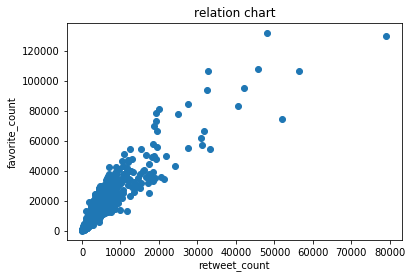

In [65]:
# 探索点赞数和转发数的关系
plt.scatter(twitter_archive_master['retweet_count'],twitter_archive_master['favorite_count'])
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('relation chart')

由以上散点图可以看出:

    点赞数和喜欢数是呈现正比的现象, 喜欢数越高,点赞数也就越高,这也是符合正常的现实情况的

Text(0, 0.5, 'favorite_count')

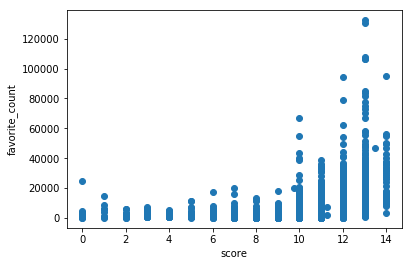

In [66]:
plt.scatter(twitter_archive_master['score'],twitter_archive_master['favorite_count'])
plt.xlabel('score')
plt.ylabel('favorite_count')

由以上的图形可以得知:
    1. 随着评分的增加,喜欢指数也是在增加的,并且在评分为 13 左右时达到了峰值
    2. 因为评分是计算后的,计算后的评分在10分以上的情况就是作者对于某狗狗的评分(分子部分)是大于 10 的, 从整个图像可以看出作者给出的评分(分子部分)多数都是大于 10 的

Text(0, 0.5, 'retweet_count')

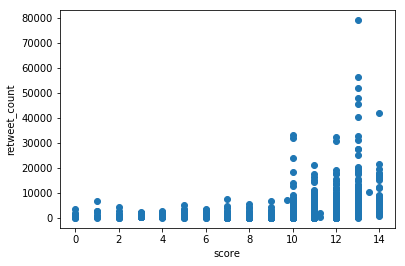

In [67]:
plt.scatter(twitter_archive_master['score'],twitter_archive_master['retweet_count'])
plt.xlabel('score')
plt.ylabel('retweet_count')

由以上的散点图同样可以看出:

    点赞数和评分也基本是点赞数越多,评分越高,在13分左右达到峰值
   

3 . 博主每次发表推特的时间点(一天中的时间点)是怎样分布的呢?

In [68]:
#查看时间列的情况
twitter_archive_master['timestamp'][0]

'2017-08-01 16:23:56'

In [69]:
# 先备份
df_1 = df.copy()

In [70]:
df_1['hour'] = df_1['timestamp'].dt.hour

In [71]:
time =df_1['hour'].value_counts()
time

1     278
0     253
2     210
16    194
3     170
17    161
23    108
18    100
4      96
15     90
19     81
20     75
21     71
22     67
5      25
14      8
6       3
13      1
Name: hour, dtype: int64

Text(0.5, 1.0, 'Time and Frequency')

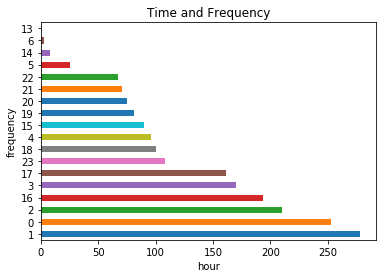

In [72]:
time.plot(kind='barh')
plt.xlabel('hour')
plt.ylabel('frequency')
plt.title('Time and Frequency')

由以上的时间分布可以知晓:

    1.博主发布推特的时间主要集中在凌晨的 0点到 2点,并且在后续的 3 点到 6 点,虽然数量有所减少,但是都有推特发出
    2.博主在 7点到 12点没有一条推特,在13点也只有仅仅一条,14点也没有,说明这段时间点应该是博主在休息的时间点
    3.博主在 15 点以后一直到 0 点发表推特的数量逐步提升
    4.我查询了一下美国有四个时区,一般分为东部和西部两个时区( 该处忽略夏威夷以及阿拉斯加地区 ),东西时区时间相差是3小时,再观察博主发表推文的时间点主要集中在每天的(以24小时来计算)早晚的时间段,这也符合自媒体推文的最佳时间点(一般自媒体推文有三个好的时间点: 6：00-8:00 上班早高峰时间段,11:00-13：00午休时间段,和 21:00-22:00晚上睡觉前的碎片时间)